In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Read combined CSV File

In [6]:
df=pd.read_csv('C:\\Users\\HP\\Project\\data\\combined_csv.csv')

In [7]:
data = df[(df['Age_Code']=='Year')&(df['Age']>=15)&(df['Age']<=49)]
len(data)

1025277

In [8]:
#Drop rows in which HB is null 

In [9]:
data = data.dropna(subset=['Haemoglobin_level'],axis=0)


In [10]:
#Drop Columns of 3 years and 5 years

In [11]:
cols_under5 = ['illness_type','illness_duration', 'treatment_type']
cols_under3 = ['first_breast_feeding', 'is_cur_breast_feeding',
       'day_or_mn_for_breast_feeding_cd', 'day_or_month_for_breast_feeding',
       'water_month', 'ani_milk_month', 'semisolid_month_or_day',
       'solid_month', 'vegetables_month_or_day']
data = data.drop(cols_under5, axis = 1)
data = data.drop(cols_under3, axis = 1)

In [12]:
# Drop unwanted variables
data = data.drop(['PSU_ID', 'ahs_house_unit', 'house_hold_no','date_survey', 'record_code_iodine_reason', 'sl_no', 'usual_residance', 'usual_residance_Reason', 'identification_code','Age_Code','date_of_birth', 'month_of_birth', 'year_of_birth','Weight_measured','Length_height_measured',
       'length_height_code','Haemoglobin_test','Haemoglobin','Diabetes_test', 'fasting_blood_glucose'], axis = 1)

In [13]:
# Mapping the labels non numeric to numeric

In [14]:
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 2})

In [15]:
data['state_code'] = data['state_code'].astype('category')
# Assigning numerical values and storing in another column
data['state_code'] = data['state_code'].cat.codes

In [16]:
data['rural_urban'] = data['rural_urban'].astype('category')
# Assigning numerical values and storing in another column
data['rural_urban'] = data['rural_urban'].cat.codes


In [17]:
data['district_code'] = data['district_code'].astype('category')
# Assigning numerical values and storing in another column
data['district_code'] = data['district_code'].cat.codes


In [18]:
data['stratum'] = data['stratum'].astype('category')
# Assigning numerical values and storing in another column
data['stratum'] = data['stratum'].cat.codes

In [19]:
data['record_code_iodine'] = data['record_code_iodine'].astype('category')
# Assigning numerical values and storing in another column
data['record_code_iodine'] = data['record_code_iodine'].cat.codes


In [20]:
data['Marital_status'] = data['Marital_status'].map({'Married and Gauna perfomed': 1, 'Never married': 2,'Married but Gauna not performed':3,'Widow':4,
                                                    'Separated':5,'Divorced':6,'Remarried':7,'Not Stated':8,'NaN':-1})

In [21]:
data['Marital_status'].value_counts()

1.0    226780
2.0     81874
3.0      7091
4.0      4277
8.0       908
5.0       779
6.0       368
7.0       243
Name: Marital_status, dtype: int64

In [22]:
data['Marital_status'] = data['Marital_status'].where(~(data['Marital_status']==8.0), other = np.nan)

In [23]:
data['gauna_perfor_not_perfor'] = data['gauna_perfor_not_perfor'].map({'Pregnant':1, 'Lactating': 2,'Non-pregnant or Non-lactating':3})

In [24]:
# Plot the weight and height in which they are not null 

In [25]:
from matplotlib import pyplot as plt # plotting
from math import *

<function matplotlib.pyplot.show(*args, **kw)>

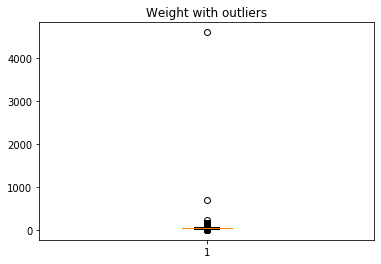

In [26]:
plt.boxplot(data['Weight_in_kg'].dropna())
plt.title('Weight with outliers')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

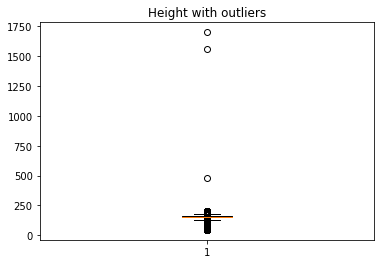

In [27]:
plt.boxplot(data['Length_height_cm'].dropna())
plt.title('Height with outliers')
plt.show

In [28]:
# Remove outliers for height and weight

In [29]:
def remove_outliers(data, feature):
    stdev = sqrt(np.var(data[feature].dropna()))
    median = np.median(data[feature].dropna())
    print("number of discarded measurements")
    display(len(data[[feature]].where(abs(data[feature] - median)>(3*stdev)).dropna()))
# keep original values if difference from mean is less than 3 standard deviations. NA otherwise
    return data[[feature]].where(abs(data[feature] - median)<(3*stdev), other = np.nan)

In [30]:
data['Length_height_cm'] = remove_outliers(data, 'Length_height_cm')

number of discarded measurements


2997

In [31]:
print('number of discarded measurements')
display(len(data[data['Weight_in_kg']<20]))
data['Weight_in_kg'] = data['Weight_in_kg'].where(data['Weight_in_kg']>20, other=np.nan)

number of discarded measurements


1688

<function matplotlib.pyplot.show(*args, **kw)>

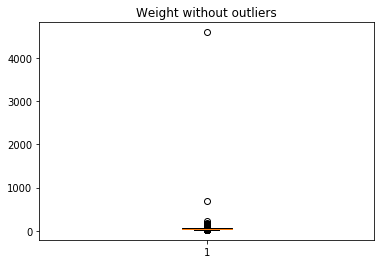

In [32]:
plt.boxplot(data['Weight_in_kg'].dropna())
plt.title('Weight without outliers')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

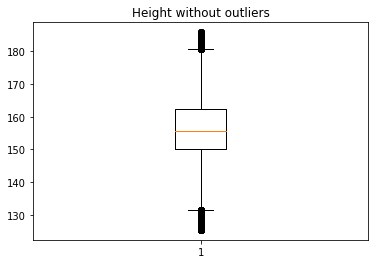

In [33]:
plt.boxplot(data['Length_height_cm'].dropna())
plt.title('Height without outliers')
plt.show

In [34]:
# Calculate body mass index for male and female age above 15

In [35]:
data['bmi'] = data['Weight_in_kg']/(data['Length_height_cm']/100)**2

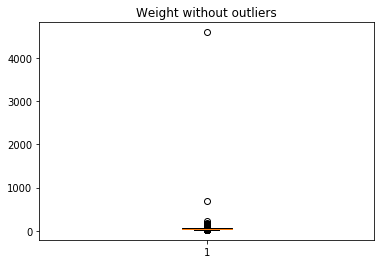

In [36]:
plt.boxplot(data['Weight_in_kg'].dropna())
plt.title('Weight without outliers')
plt.show()

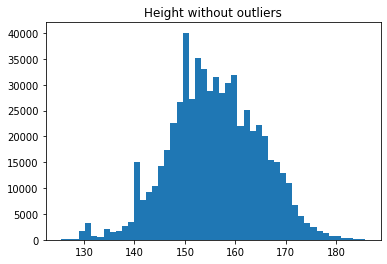

In [37]:
plt.hist(data['Length_height_cm'].dropna(), bins = 50)
plt.title('Height without outliers')
plt.show()

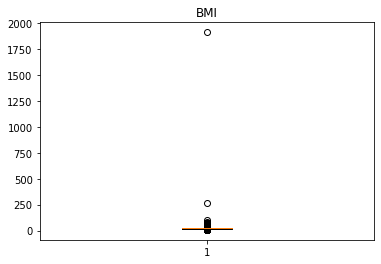

In [38]:
plt.boxplot(data['bmi'].dropna())
plt.title('BMI')
plt.show()

In [39]:
# Remove outliers for BP Systolic, BP Diastolic And Pulse Rate 

In [40]:
def remove_outliers_difference(data, col1, col2):
    stdev = sqrt((data[col1] - data[col2]).var())
# how many measurements were excluded
    print('number of discarded measurements')
    display(len(data[[col1, col2]].where(abs(data[col1] - data[col2])>(3*stdev)).dropna()))
# keep original values if difference of two measurements is less than 3 standard deviations. NA otherwise
    return data[[col1, col2]].where(abs(data[col1] - data[col2])<(3*stdev), other = np.nan)

In [41]:
data[['BP_systolic', 'BP_systolic_2_reading']] = remove_outliers_difference(data, 'BP_systolic', 'BP_systolic_2_reading')
data[['BP_Diastolic', 'BP_Diastolic_2reading']] = remove_outliers_difference(data, 'BP_Diastolic', 'BP_Diastolic_2reading')
data[['Pulse_rate', 'Pulse_rate_2_reading']] = remove_outliers_difference(data, 'Pulse_rate', 'Pulse_rate_2_reading')

number of discarded measurements


7126

number of discarded measurements


9627

number of discarded measurements


9047

In [42]:
# function for aggregate_reading of BP_systolic,BP_Diastolic and Pulse_rate

In [43]:
def aggregate_readings(data, col1, col2):
    data[col1] = data.apply(lambda row: sum([row[col1], row[col2]])/2, axis = 1)
    data = data.drop(col2, axis = 1)
    return data

In [44]:
data = aggregate_readings(data, 'BP_systolic', 'BP_systolic_2_reading')
data = aggregate_readings(data, 'BP_Diastolic', 'BP_Diastolic_2reading')
data = aggregate_readings(data, 'Pulse_rate', 'Pulse_rate_2_reading')

In [45]:
data[['BP_Diastolic', 'BP_systolic']] = data[['BP_Diastolic', 'BP_systolic']].where(data.BP_Diastolic < data.BP_systolic, other = np.nan)

In [46]:
#Plot Histogram for HB & fasting_blood_glucose

<function matplotlib.pyplot.show(*args, **kw)>

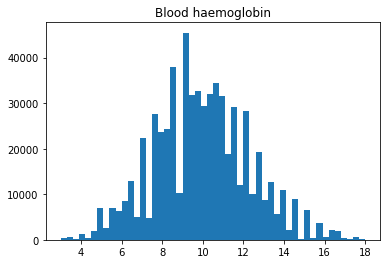

In [47]:
plt.hist(data['Haemoglobin_level'], bins = 50)
plt.title('Blood haemoglobin')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

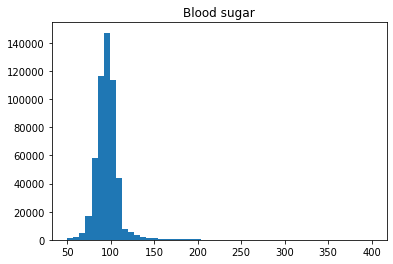

In [48]:
plt.hist(data.fasting_blood_glucose_mg_dl[~np.isnan(data.fasting_blood_glucose_mg_dl)], bins=50)
plt.title('Blood sugar')
plt.show

In [49]:
#Remove Outliers for fasting_blood_glucose

In [50]:
data['fasting_blood_glucose_mg_dl'] = remove_outliers(data,'fasting_blood_glucose_mg_dl')

number of discarded measurements


5935

<function matplotlib.pyplot.show(*args, **kw)>

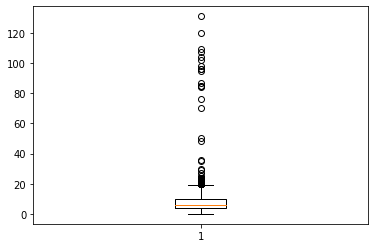

In [51]:
plt.boxplot(data['duration_pregnanacy'].dropna())
plt.show

In [52]:
# Correlation Biomarkers with all other variables

In [53]:
corr=data.corr()[['Haemoglobin_level', 'Pulse_rate', 'BP_Diastolic', 'BP_systolic', 'fasting_blood_glucose_mg_dl']]
corr.where(abs(corr)>0.1)

,Haemoglobin_level,Pulse_rate,BP_Diastolic,BP_systolic,fasting_blood_glucose_mg_dl
state_code,NaN,NaN,NaN,NaN,NaN
district_code,NaN,NaN,NaN,NaN,NaN
rural_urban,NaN,NaN,NaN,NaN,NaN
stratum,NaN,NaN,NaN,NaN,NaN
test_salt_iodine,NaN,NaN,NaN,NaN,NaN
record_code_iodine,NaN,NaN,NaN,NaN,NaN
Sex,-0.178656,0.167566,NaN,-0.124442,NaN
Age,NaN,NaN,0.184492,0.213325,0.127532
Weight_in_kg,0.115508,NaN,0.281701,0.270148,0.106400
Length_height_cm,0.181311,-0.110651,0.108778,0.109140,NaN


In [54]:
data_correlated = data.drop(['district_code','rural_urban', 'stratum', 'test_salt_iodine', 'record_code_iodine', 'duration_pregnanacy'], axis = 1)
corr = data_correlated.corr()[['Haemoglobin_level', 'Pulse_rate', 'BP_Diastolic', 'BP_systolic', 'fasting_blood_glucose_mg_dl']]
corr.where(abs(corr)>0.1)

,Haemoglobin_level,Pulse_rate,BP_Diastolic,BP_systolic,fasting_blood_glucose_mg_dl
state_code,NaN,NaN,NaN,NaN,NaN
Sex,-0.178656,0.167566,NaN,-0.124442,NaN
Age,NaN,NaN,0.184492,0.213325,0.127532
Weight_in_kg,0.115508,NaN,0.281701,0.270148,0.106400
Length_height_cm,0.181311,-0.110651,0.108778,0.109140,NaN
Haemoglobin_level,1.000000,NaN,NaN,NaN,NaN
BP_systolic,NaN,NaN,0.687652,1.000000,0.107727
BP_Diastolic,NaN,0.186358,1.000000,0.687652,NaN
Pulse_rate,NaN,1.000000,0.186358,NaN,NaN
fasting_blood_glucose_mg_dl,NaN,NaN,NaN,0.107727,1.000000


In [55]:
data_anemia = data[['state_code',"stratum","test_salt_iodine","record_code_iodine","Sex","Age","Weight_in_kg","Length_height_cm","Haemoglobin_level","BP_systolic","BP_Diastolic","Pulse_rate",\
                    "fasting_blood_glucose_mg_dl","Marital_status",'gauna_perfor_not_perfor',"duration_pregnanacy","bmi"]]
data_anemia.head()

,state_code,stratum,test_salt_iodine,record_code_iodine,Sex,Age,Weight_in_kg,Length_height_cm,Haemoglobin_level,BP_systolic,BP_Diastolic,Pulse_rate,fasting_blood_glucose_mg_dl,Marital_status,gauna_perfor_not_perfor,duration_pregnanacy,bmi
0,0,2,7,0,2,37.0,48.099998,147.89999,8.0,125.5,67.0,75.0,89.0,1.0,3.0,NaN,21.989167
1,0,2,7,0,1,17.0,25.600000,160.30000,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.962605
7,0,2,7,0,2,47.0,49.200001,147.70000,10.5,133.0,91.0,97.0,91.0,1.0,3.0,NaN,22.552990
10,0,2,7,0,1,33.0,53.599998,164.10001,8.0,126.5,89.0,75.0,90.0,NaN,NaN,NaN,19.904330
11,0,2,7,0,2,25.0,47.000000,147.80000,11.0,116.5,67.5,94.5,96.0,1.0,2.0,7.0,21.515378


In [56]:
data_anemia.describe(include='all')

,state_code,stratum,test_salt_iodine,record_code_iodine,Sex,Age,Weight_in_kg,Length_height_cm,Haemoglobin_level,BP_systolic,BP_Diastolic,Pulse_rate,fasting_blood_glucose_mg_dl,Marital_status,gauna_perfor_not_perfor,duration_pregnanacy,bmi
count,625757.000000,625757.000000,625757.000000,625757.000000,625757.000000,625757.000000,617630.000000,616314.000000,625757.000000,523046.000000,523046.000000,528998.000000,522744.000000,321412.000000,226363.000000,41229.000000,614916.000000
mean,4.212584,1.103142,22.623031,0.885962,1.543160,29.945766,49.931683,155.885259,9.935201,119.269100,76.951524,80.240491,94.463319,1.358733,2.742533,8.079095,20.486705
std,2.446343,0.897335,9.972829,0.416529,0.498134,9.980040,11.660526,8.969083,2.350635,16.108129,12.072212,11.597481,10.882476,0.654733,0.575148,5.992292,4.202759
min,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.100000,125.400000,3.000000,61.000000,40.000000,40.000000,50.000000,1.000000,1.000000,0.000000,6.509600
25%,2.000000,0.000000,15.000000,1.000000,1.000000,21.000000,43.099998,150.000000,8.400000,109.000000,69.000000,72.000000,88.000000,1.000000,3.000000,4.000000,18.260565
50%,4.000000,1.000000,30.000000,1.000000,2.000000,29.000000,49.299999,155.600010,9.800000,118.500000,77.000000,79.500000,95.000000,1.000000,3.000000,6.000000,20.229130
75%,7.000000,2.000000,30.000000,1.000000,2.000000,39.000000,55.599998,162.300000,11.500000,128.000000,84.000000,87.500000,101.000000,2.000000,3.000000,10.000000,22.281390
max,8.000000,2.000000,67.000000,2.000000,2.000000,49.000000,4602.000000,185.800000,18.000000,249.500000,160.000000,140.000000,143.000000,7.000000,3.000000,131.000000,1910.570996


In [57]:
data_anemia['Sex'].value_counts()

2    339886
1    285871
Name: Sex, dtype: int64

In [58]:
#Create a dataframe 
# Create a new column anemia where female_HB is less than 12
# In Anemia Column: 1 indicates Anemia and 0 indicates no Anemia
#Sex=2 means female, gauna_perfor_not_perfor']==1 means pregnant 
female_anemia=data_anemia[(data_anemia['Sex'] == 2) & (data_anemia['gauna_perfor_not_perfor']!=1)]


In [59]:
female_anemia['Haemoglobin_level']

0           8.0
7          10.5
11         11.0
18          8.5
21         13.5
           ... 
1889301     9.1
1889309     5.6
1889314    10.2
1889315     9.6
1889316    10.2
Name: Haemoglobin_level, Length: 324122, dtype: float64

In [60]:
female_anemia['anemia'] = np.where((female_anemia['Haemoglobin_level'] <12), 1, 0)

In [61]:
female_anemia['anemia'].value_counts()

1    278895
0     45227
Name: anemia, dtype: int64

In [62]:
female_anemia[['Haemoglobin_level','anemia']]

,Haemoglobin_level,anemia
0,8.0,1
7,10.5,1
11,11.0,1
18,8.5,1
21,13.5,0
...,...,...
1889301,9.1,1
1889309,5.6,1
1889314,10.2,1
1889315,9.6,1


In [63]:
female_anemia.isnull().sum()

state_code                          0
stratum                             0
test_salt_iodine                    0
record_code_iodine                  0
Sex                                 0
Age                                 0
Weight_in_kg                     3385
Length_height_cm                 3885
Haemoglobin_level                   0
BP_systolic                     50348
BP_Diastolic                    50348
Pulse_rate                      47517
fasting_blood_glucose_mg_dl     50078
Marital_status                  18922
gauna_perfor_not_perfor        113822
duration_pregnanacy            298183
bmi                              4556
anemia                              0
dtype: int64

In [64]:
#Apply Imputer to remove Nan values

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
female_anemia_imputed = pd.DataFrame(imputer.fit_transform(female_anemia))
female_anemia_imputed.columns = female_anemia.columns
female_anemia_imputed.index = female_anemia.index
female_anemia = female_anemia_imputed

In [66]:
#Check for null values
female_anemia.isnull().sum()

state_code                     0
stratum                        0
test_salt_iodine               0
record_code_iodine             0
Sex                            0
Age                            0
Weight_in_kg                   0
Length_height_cm               0
Haemoglobin_level              0
BP_systolic                    0
BP_Diastolic                   0
Pulse_rate                     0
fasting_blood_glucose_mg_dl    0
Marital_status                 0
gauna_perfor_not_perfor        0
duration_pregnanacy            0
bmi                            0
anemia                         0
dtype: int64

In [67]:
state=female_anemia.groupby(["state_code","Sex","anemia"])["anemia"].count()
state

state_code  Sex  anemia
0.0         2.0  0.0        2865
                 1.0       25837
1.0         2.0  0.0        5301
                 1.0       37413
2.0         2.0  0.0        4708
                 1.0       17096
3.0         2.0  0.0        3604
                 1.0       17848
4.0         2.0  0.0        8276
                 1.0       41672
5.0         2.0  0.0        8688
                 1.0       30056
6.0         2.0  0.0        5140
                 1.0       29213
7.0         2.0  0.0        5661
                 1.0       67536
8.0         2.0  0.0         984
                 1.0       12224
Name: anemia, dtype: int64

In [68]:
ab=female_anemia[female_anemia['anemia']==1]

In [69]:
state=ab.groupby(['state_code'])["anemia"].count()
state

state_code
0.0    25837
1.0    37413
2.0    17096
3.0    17848
4.0    41672
5.0    30056
6.0    29213
7.0    67536
8.0    12224
Name: anemia, dtype: int64

Text(0, 0.5, 'No. of Females')

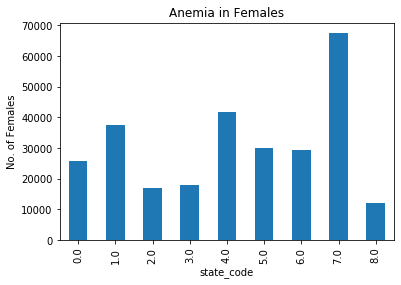

In [70]:
state.plot(kind='bar')
plt.xlabel('state_code')
plt.title('Anemia in Females')
plt.ylabel('No. of Females')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E935F04188>,
      dtype=object)

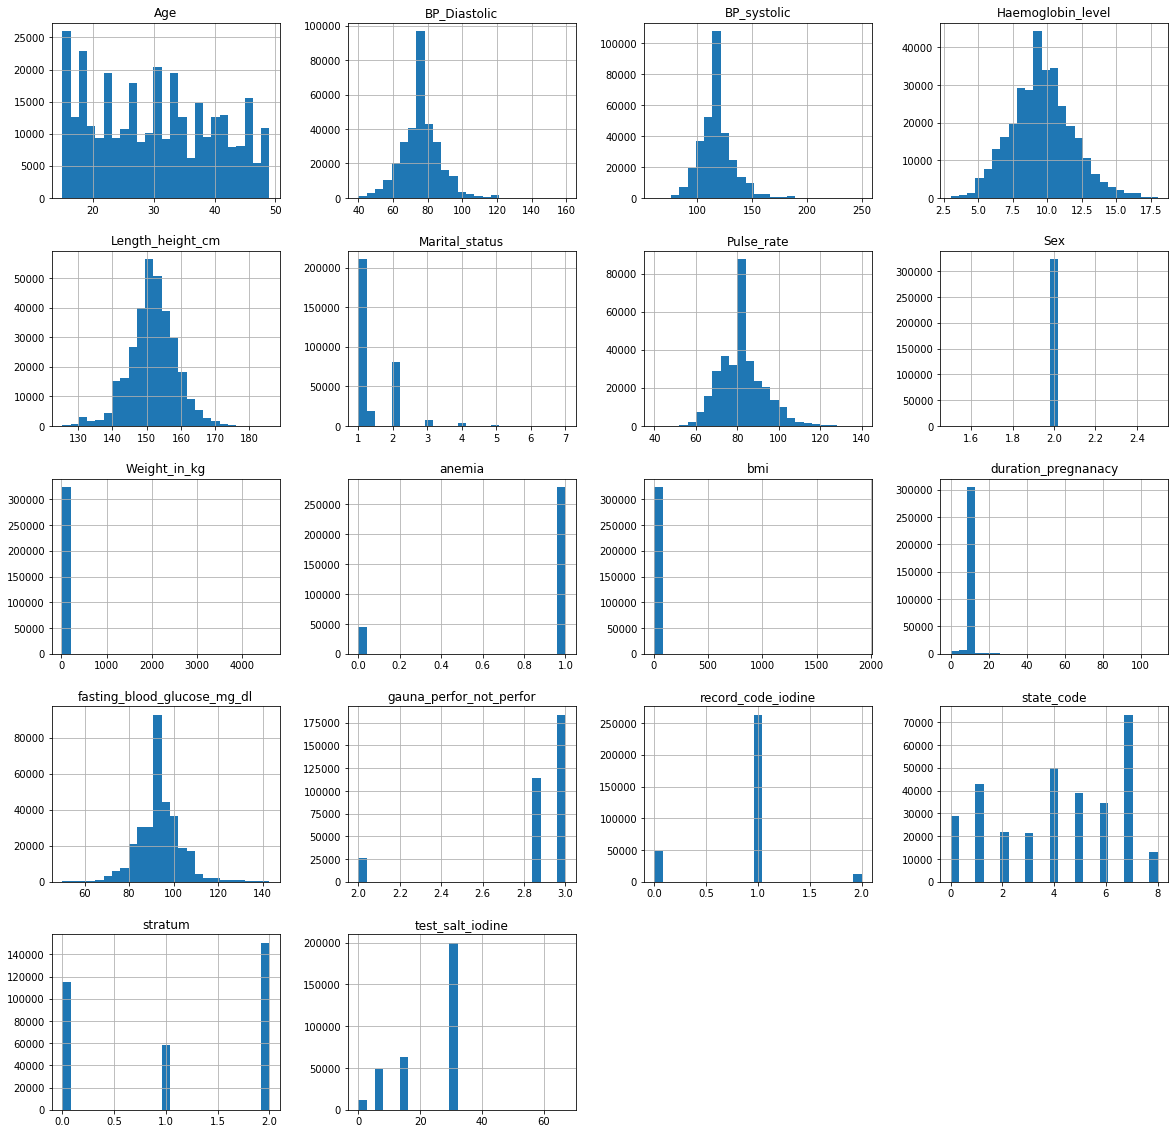

In [71]:
#Plot Histogram for the Severe_anemia dataframe
female_anemia.hist(bins=25,figsize=(20,20))

In [72]:
#Drop HB_level Column
female_anemia=female_anemia.drop(['Haemoglobin_level','Marital_status','state_code'],axis=1)

In [73]:
#Split the Dataframe into training and test set
#Test set size = 20% and train set size=80%

In [74]:
from sklearn.model_selection import train_test_split
X = female_anemia.drop('anemia',axis=1)
y = female_anemia.anemia
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression(random_state = 0)

LogReg_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred = LogReg_clf.predict(X_test)

In [78]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8612418048592364
